In [1]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum
from scipy.io import loadmat, savemat 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\tkalra\AppData\Local\Continuum\anaconda3\lib\site-packages\stingray\crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [2]:
# 1. Read a time stacked image.. with vertical axis as distance and horizontal axis of time - currently done manually 
matstack = loadmat('bispectral_FI_intervals.mat') #,'f_FI','fv_post_FI','fv_neg_FI')
#                  save('bispectral_FI_intervals.mat', 'f_neg_Su_FI_1st', 'f_post_Su_FI_2nd');

#xx = matstack['f_FI']
#times=1/xx 
dt=0.015625  ; # bandwidth

#freq = 1 #Hz
exposure = 1  # seconds
times = np.arange(0, exposure, dt)  # seconds
counts= matstack['f_neg_Su_FI_1st']
print(times)
counts=np.squeeze(counts)
print(np.size(times))

#print(np.type(counts))
#Sv  = matstack['Sv_subset']

[0.       0.015625 0.03125  0.046875 0.0625   0.078125 0.09375  0.109375
 0.125    0.140625 0.15625  0.171875 0.1875   0.203125 0.21875  0.234375
 0.25     0.265625 0.28125  0.296875 0.3125   0.328125 0.34375  0.359375
 0.375    0.390625 0.40625  0.421875 0.4375   0.453125 0.46875  0.484375
 0.5      0.515625 0.53125  0.546875 0.5625   0.578125 0.59375  0.609375
 0.625    0.640625 0.65625  0.671875 0.6875   0.703125 0.71875  0.734375
 0.75     0.765625 0.78125  0.796875 0.8125   0.828125 0.84375  0.859375
 0.875    0.890625 0.90625  0.921875 0.9375   0.953125 0.96875  0.984375]
64


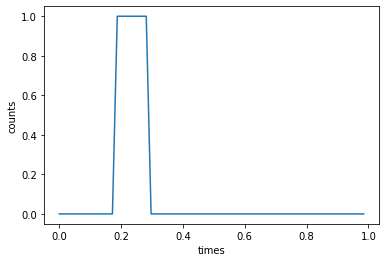

In [3]:

#times = np.arange(1,11)
#counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])


lc = lightcurve.Lightcurve(times,counts)
print(lc)
lc.plot(labels=['times','counts'])

window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')#lc.counts

In [4]:
window = 'hanning'

bs = Bispectrum(lc,maxlag=25,window = window, scale ='unbiased')
#bs = Bispectrum(lc)


In [5]:
bs.freq


array([-32.  , -30.72, -29.44, -28.16, -26.88, -25.6 , -24.32, -23.04,
       -21.76, -20.48, -19.2 , -17.92, -16.64, -15.36, -14.08, -12.8 ,
       -11.52, -10.24,  -8.96,  -7.68,  -6.4 ,  -5.12,  -3.84,  -2.56,
        -1.28,   0.  ,   1.28,   2.56,   3.84,   5.12,   6.4 ,   7.68,
         8.96,  10.24,  11.52,  12.8 ,  14.08,  15.36,  16.64,  17.92,
        19.2 ,  20.48,  21.76,  23.04,  24.32,  25.6 ,  26.88,  28.16,
        29.44,  30.72,  32.  ])

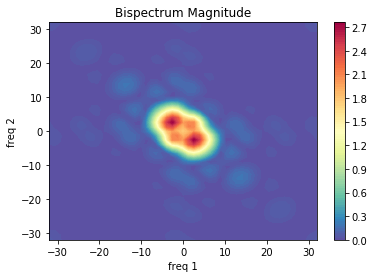

In [6]:
p = bs.plot_mag()
p.show()

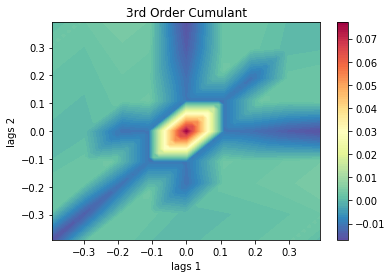

In [7]:
p = bs.plot_cum3()


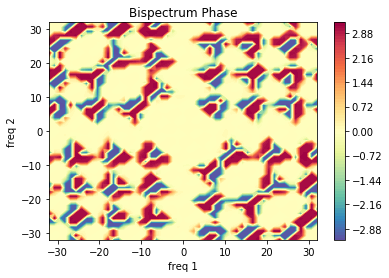

In [8]:
p = bs.plot_phase()
